#  Моделирование выполнения теоремы Гливенко-Кантелли

Теорема Гливенко-Кантелли: $sup_x|F(x) − \bar F_n(x)| \to 0, n \to \infty$

In [85]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

Сначала я проведу моделирование на примере распределения Бернулли.

In [49]:
#установлю параметры для распределения
p = 0.3
q = 1 - p

In [50]:
#генеральная функция распределения, зависит только от x
def general_F_Bernulli(x):
    if x < 0:
        return 0
    elif x < 1:
        return q
    else:
        return 1

Эмперическая функция распределения: $\bar F_n(x) = \frac{1}{n} \sum_{X_i < x}$

In [78]:
#эмперическая функция распределения, зависит от выборки и от x
def imperical_F(sample, x):
    return np.sum(np.where(sample < x, 1, 0)) / len(sample)

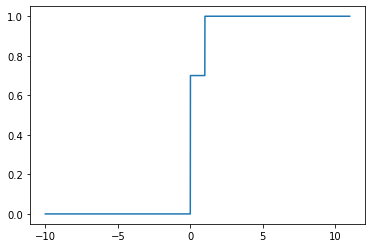

In [70]:
#график генеральной функции распределения Бернулли
X = np.arange(-10, 11, 0.01)
Y_general = np.array([general_F_Bernulli(x) for x in X])
plt.plot(X, Y_general)
plt.show()

Сгенерируем несколько разных выборок и построим эмперические функции распределения.

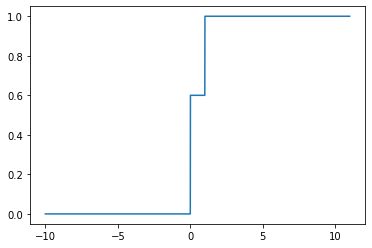

In [80]:
n = 10
s1 = np.random.binomial(1, p, n)
Y = np.array([imperical_F(s1, x) for x in X])
plt.plot(X, Y)
plt.show()

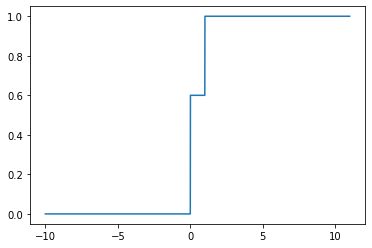

In [81]:
n = 100
s2 = np.random.binomial(1, p, n)
Y = np.array([imperical_F(s1, x) for x in X])
plt.plot(X, Y)
plt.show()

Теперь построим график зависимости $sup_x|F(x) − \bar F_n(x)|$ от $n$.

In [76]:
N = range(1, 1000)
S = []
sample = []
for n in N:
    sample += [np.random.binomial(1, p)]
    Y = np.array([imperical_F(sample, x) for x in X])
    sup = np.max(np.abs(Y - Y_general))
    S.append(sup)

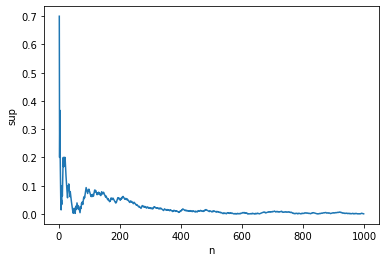

In [77]:
plt.plot(N, S)
plt.xlabel("n")
plt.ylabel("sup")
plt.show()

На графике видно, что $sup_x|F(x) − \bar F_n(x)|$ стремится к нулю с увеличением n.

Теперь я проведу моделирование на нормальном распределении

In [84]:
#задаём параметры нормального распределения
mu = 0
d = 1

In [87]:
#генеральная функция распределения
def general_F_normal(x):
    return norm.cdf(x, mu, d)

Эмперическая функция распределения считается одинаково для всех видов распределения.

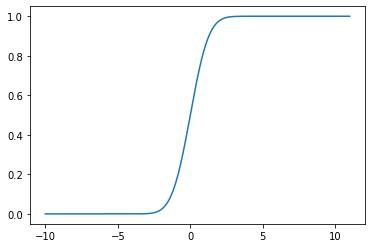

In [88]:
#график генеральной функции распределения
Y_normal = np.array([general_F_normal(x) for x in X])
plt.plot(X, Y_normal)
plt.show()

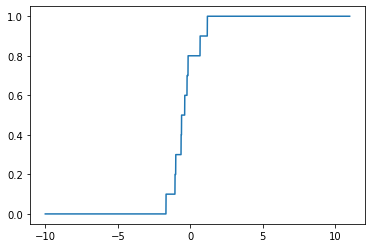

In [90]:
#график эмперической функции распределения для разных n
n = 10
s3 = np.random.normal(mu, d, n)
Y = np.array([imperical_F(s3, x) for x in X])
plt.plot(X, Y)
plt.show()

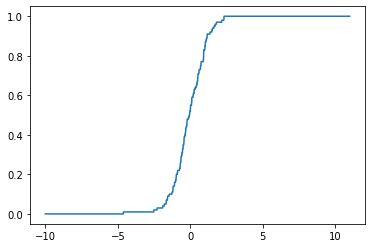

In [91]:
n = 100
s4 = np.random.normal(mu, d, n)
Y = np.array([imperical_F(s4, x) for x in X])
plt.plot(X, Y)
plt.show()

Теперь построим график зависимости $sup_x|F(x) − \bar F_n(x)|$ от $n$.

In [97]:
N = range(1, 1000)
S_normal = []
sample = []
for n in N:
    sample += [np.random.normal(mu, d)]
    Y = np.array([imperical_F(sample, x) for x in X])
    sup = np.max(np.abs(Y - Y_normal))
    S_normal.append(sup)

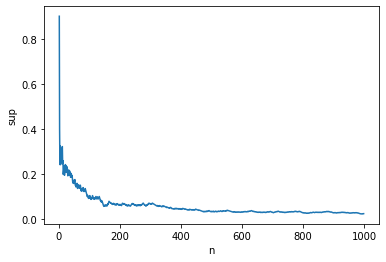

In [98]:
plt.plot(N, S_normal)
plt.xlabel("n")
plt.ylabel("sup")
plt.show()

По графику видно, что $sup_x|F(x) − \bar F_n(x)|$ стремится к нулю с увеличением n.